# Model training, parameter tuning and evaluation

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

## Load datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Define and run the Grid Search

In [13]:
model = SVC()
pipeline = Pipeline([('model', model)])

param_grid_svc = {
    'model': [SVC(random_state=42)],
    'model__kernel': ['linear', 'poly', 'rbf'],
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto'],
    }

param_grid_rf = {
    'model': [RandomForestClassifier(random_state=42)],
    'model__n_estimators': [10, 100, 1000],
    'model__max_features': ['sqrt', 'log2'],
    'model__max_depth': [2, 4, 6, 8, 10],
    'model__criterion': ['gini', 'entropy'],
    }

param_grid = [param_grid_svc, param_grid_rf]

grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=3, n_jobs=-1)

In [30]:
grid_search.fit(train.drop('emotion', axis=1), train['emotion'])

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVC())]), n_jobs=-1,
             param_grid=[{'model': [SVC(random_state=42)],
                          'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'poly', 'rbf']},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 4, 6, 8, 10],
                          'model__max_features': ['sqrt', 'log2'],
                          'model__n_estimators': [10, 100, 1000]}],
             verbose=3)

In [31]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('rank_test_score', inplace=True)
display(results[['params', 'mean_test_score', 'rank_test_score']].head(10))

,params,mean_test_score,rank_test_score
85,{'model': RandomForestClassifier(random_state=...,0.616907,1
88,{'model': RandomForestClassifier(random_state=...,0.616907,1
6,"{'model': SVC(random_state=42), 'model__C': 0....",0.615832,3
9,"{'model': SVC(random_state=42), 'model__C': 0....",0.615832,3
24,"{'model': SVC(random_state=42), 'model__C': 10...",0.615832,5
27,"{'model': SVC(random_state=42), 'model__C': 10...",0.615832,5
59,{'model': RandomForestClassifier(random_state=...,0.615619,7
56,{'model': RandomForestClassifier(random_state=...,0.615619,7
18,"{'model': SVC(random_state=42), 'model__C': 10...",0.615617,9
21,"{'model': SVC(random_state=42), 'model__C': 10...",0.615617,9


In [32]:
print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

best_model.fit(train.drop('emotion', axis=1), train['emotion'])

# save the model
pickle.dump(best_model, open('best_model.pkl', 'wb'))

Best parameters: {'model': RandomForestClassifier(random_state=42), 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


## Evaluate the best model

In [22]:
# load the model
best_model = pickle.load(open('best_model.pkl', 'rb'))

In [23]:
print(f"Train data accuracy: {best_model.score(train.drop('emotion', axis=1), train['emotion'])}")
print(f"Test data accuracy: {best_model.score(test.drop('emotion', axis=1), test['emotion'])}")

print(f"Train data f1-score: {f1_score(train['emotion'], best_model.predict(train.drop('emotion', axis=1)), average='macro')}")
print(f"Test data f1-score: {f1_score(test['emotion'], best_model.predict(test.drop('emotion', axis=1)), average='macro')}")

Train data accuracy: 0.8382668382668382
Test data accuracy: 0.6274131274131274
Train data f1-score: 0.816318745707735
Test data f1-score: 0.5388067081894807


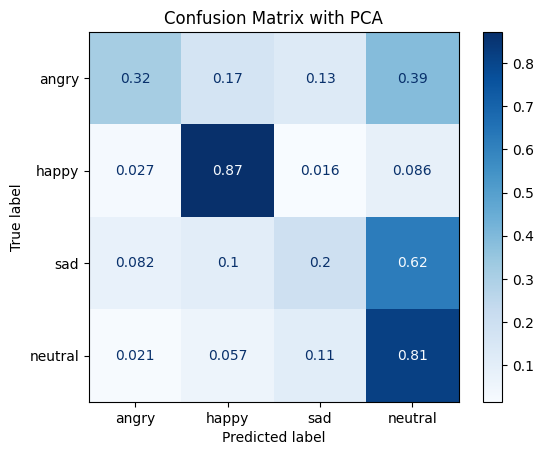

In [24]:
test_pred = best_model.predict(test.drop('emotion', axis=1))

labels = ["angry", "happy", "sad", "neutral"]
cm = confusion_matrix(test["emotion"], test_pred, normalize='true', labels=labels)
dsp = ConfusionMatrixDisplay(cm, display_labels=labels)
dsp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix with PCA")
plt.show()

In [25]:
print(f"Classification report with PCA:\n")
print(
    classification_report(test["emotion"], test_pred, labels=labels)
)

Classification report with PCA:

              precision    recall  f1-score   support

       angry       0.65      0.32      0.43        95
       happy       0.83      0.87      0.85       186
         sad       0.39      0.20      0.26        97
     neutral       0.50      0.81      0.62       140

    accuracy                           0.63       518
   macro avg       0.59      0.55      0.54       518
weighted avg       0.62      0.63      0.60       518



## Repeat without PCA

In [7]:
train_wo_pca = pd.read_csv('train_wo_pca.csv')
test_wo_pca = pd.read_csv('test_wo_pca.csv')

In [14]:
grid_search.fit(train_wo_pca.drop('emotion', axis=1), train_wo_pca['emotion'])

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', SVC())]), n_jobs=-1,
             param_grid=[{'model': [SVC(random_state=42)],
                          'model__C': [0.01, 0.1, 1, 10, 100],
                          'model__gamma': ['scale', 'auto'],
                          'model__kernel': ['linear', 'poly', 'rbf']},
                         {'model': [RandomForestClassifier(random_state=42)],
                          'model__criterion': ['gini', 'entropy'],
                          'model__max_depth': [2, 4, 6, 8, 10],
                          'model__max_features': ['sqrt', 'log2'],
                          'model__n_estimators': [10, 100, 1000]}],
             verbose=3)

In [15]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values('rank_test_score', inplace=True)
display(results[['params', 'mean_test_score', 'rank_test_score']].head(10))

,params,mean_test_score,rank_test_score
85,{'model': RandomForestClassifier(random_state=...,0.623124,1
88,{'model': RandomForestClassifier(random_state=...,0.623124,1
89,{'model': RandomForestClassifier(random_state=...,0.622050,3
86,{'model': RandomForestClassifier(random_state=...,0.622050,3
46,{'model': RandomForestClassifier(random_state=...,0.621837,5
43,{'model': RandomForestClassifier(random_state=...,0.621837,5
59,{'model': RandomForestClassifier(random_state=...,0.621836,7
56,{'model': RandomForestClassifier(random_state=...,0.621836,7
79,{'model': RandomForestClassifier(random_state=...,0.621623,9
82,{'model': RandomForestClassifier(random_state=...,0.621623,9


In [17]:
print(f"Best parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

best_model.fit(train_wo_pca.drop('emotion', axis=1), train_wo_pca['emotion'])

# save the model
pickle.dump(best_model, open('best_model_wo_pca.pkl', 'wb'))

Best parameters: {'model': RandomForestClassifier(random_state=42), 'model__criterion': 'entropy', 'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__n_estimators': 100}


In [26]:
# load the model
best_model = pickle.load(open('best_model_wo_pca.pkl', 'rb'))

In [27]:
print(f"Train data accuracy: {best_model.score(train_wo_pca.drop('emotion', axis=1), train_wo_pca['emotion'])}")
print(f"Test data accuracy: {best_model.score(test_wo_pca.drop('emotion', axis=1), test_wo_pca['emotion'])}")

print(f"Train data f1-score: {f1_score(train_wo_pca['emotion'], best_model.predict(train_wo_pca.drop('emotion', axis=1)), average='macro')}")
print(f"Test data f1-score: {f1_score(test_wo_pca['emotion'], best_model.predict(test_wo_pca.drop('emotion', axis=1)), average='macro')}")

Train data accuracy: 0.8637923637923638
Test data accuracy: 0.6332046332046332
Train data f1-score: 0.8441985843093065
Test data f1-score: 0.5399152277618727


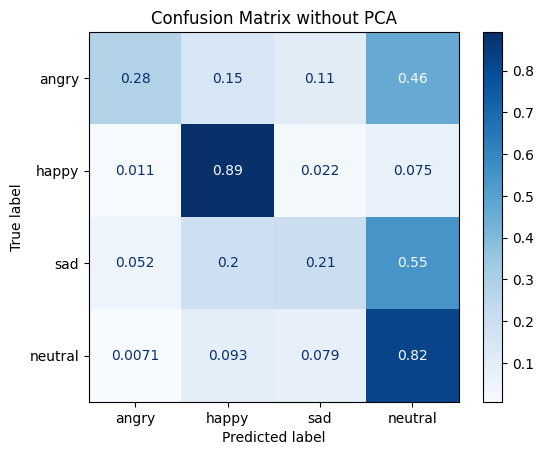

In [28]:
test_pred = best_model.predict(test_wo_pca.drop('emotion', axis=1))

labels = ["angry", "happy", "sad", "neutral"]
cm = confusion_matrix(test_wo_pca["emotion"], test_pred, normalize='true', labels=labels)
dsp = ConfusionMatrixDisplay(cm, display_labels=labels)
dsp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix without PCA")
plt.show()

In [29]:
print(f"Classification report without PCA:\n")
print(
    classification_report(test_wo_pca["emotion"], test_pred, labels=labels)
)

Classification report without PCA:

              precision    recall  f1-score   support

       angry       0.77      0.28      0.42        95
       happy       0.78      0.89      0.83       186
         sad       0.44      0.21      0.28        97
     neutral       0.51      0.82      0.63       140

    accuracy                           0.63       518
   macro avg       0.63      0.55      0.54       518
weighted avg       0.64      0.63      0.60       518

